In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import date, timedelta

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
#Use inspector to find column headers for measurement class
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
#Use inspector to find column headers for measurement class
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
engine.execute('SELECT * FROM Measurement ORDER BY Measurement.date DESC LIMIT 15').fetchall()

[(2724, 'USC00519397', '2017-08-23', 0.0, 81.0),
 (7635, 'USC00514830', '2017-08-23', 0.0, 82.0),
 (12187, 'USC00519523', '2017-08-23', 0.08, 82.0),
 (19550, 'USC00516128', '2017-08-23', 0.45, 76.0),
 (2723, 'USC00519397', '2017-08-22', 0.0, 82.0),
 (12186, 'USC00519523', '2017-08-22', 0.0, 82.0),
 (19549, 'USC00516128', '2017-08-22', 0.5, 76.0),
 (2722, 'USC00519397', '2017-08-21', 0.0, 81.0),
 (7634, 'USC00514830', '2017-08-21', 0.02, 79.0),
 (12185, 'USC00519523', '2017-08-21', None, 82.0),
 (19548, 'USC00516128', '2017-08-21', 0.56, 76.0),
 (2721, 'USC00519397', '2017-08-20', 0.0, 81.0),
 (7633, 'USC00514830', '2017-08-20', 0.01, 80.0),
 (19547, 'USC00516128', '2017-08-20', None, 78.0),
 (2720, 'USC00519397', '2017-08-19', 0.0, 79.0)]

# Exploratory Climate Analysis

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# find the last date 
Ldate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
Ldate

('2017-08-23')

In [14]:
# Calculate the date 1 year ago from the last data point in the database
yrAgo = dt.date(2017, 8, 23) - dt.timedelta(days=365)
yrAgo

datetime.date(2016, 8, 23)

In [15]:
# Perform a query to retrieve the data and precipitation scores
percip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= yrAgo).all()
percip

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [16]:
#Save the query results as a Pandas DataFrame and set the index to the date column
percip_df = pd.DataFrame(percip, columns=['date', 'precipitation'])
percip_df.set_index('date', inplace=True)
# Sort the dataframe by date
percip_df.sort_values('date' , ascending=True)
percip_df.head()

,precipitation
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


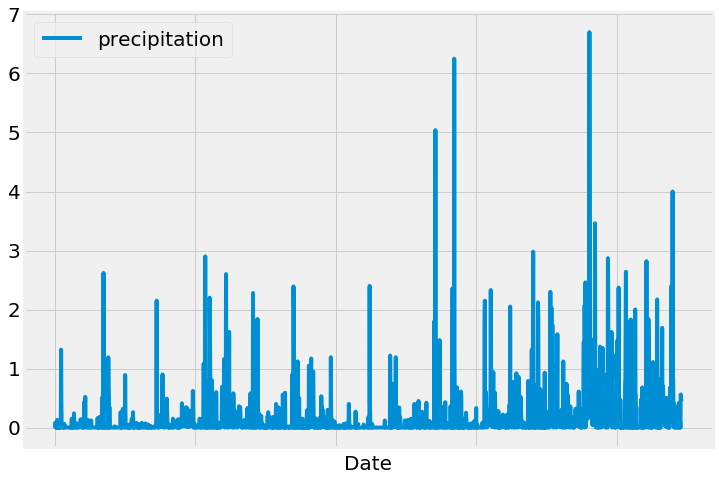

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data
percip_df.plot(x_compat=True, figsize=(11, 8), fontsize = 20, stacked=True)
plt.xlabel('Date', fontsize = 20)
plt.legend(fontsize=20)
plt.show()

In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
percip_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [19]:
# Design a query to show how many stations are available in this dataset?
query_count = session.query(Station).count()
query_count

9

In [20]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
engine.execute('SELECT station, COUNT(*) AS num_of_stations FROM Measurement \
    GROUP BY Measurement.station ORDER BY num_of_stations DESC LIMIT 10').fetchall()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Station.station == 'USC00519281').first()

(53.0, 87.0, 73.09795396419437)

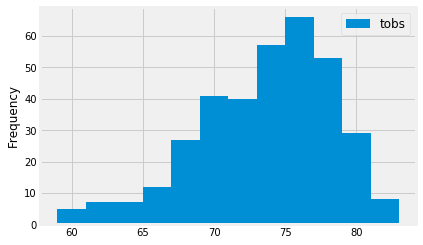

In [22]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps = session.query(Measurement.tobs).filter(Measurement.date >= yrAgo).filter(Measurement.station == 'USC00519281').all()
temps
#ravel temps in to list 
temps_list = list(np.ravel(temps))
#Create histogram
plt.hist(temps_list, bins=12, histtype='bar', label='tobs')
plt.ylabel('Frequency')
plt.legend(prop={'size': 12})
plt.show()


In [23]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [24]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2011-02-28', '2011-03-05'))

[(61.0, 69.75510204081633, 75.0)]


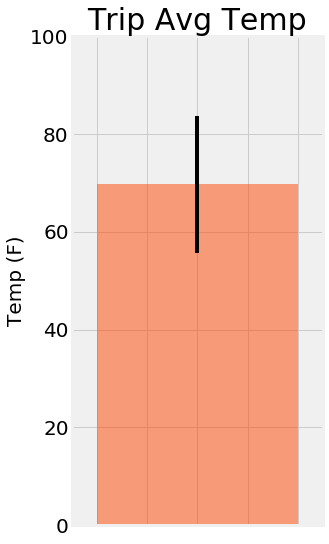

In [25]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

#Break out calc_temps in to variables for max min and avg
trip_temps = calc_temps('2011-02-28', '2011-03-05')
trip_temps_lst = list(np.ravel(trip_temps))
trip_min = trip_temps_lst[0]
trip_ave = trip_temps_lst[1]
trip_max = trip_temps_lst[2]

#Plot avg temp with error bar
fig,ax = plt.subplots(figsize=(4,9))
plt.bar(0, height=trip_ave, yerr= (trip_max-trip_min), color='orangered', alpha = .50)
ax.set_xticklabels([])
ax.yaxis.set_tick_params(labelsize=20)
plt.title('Trip Avg Temp', fontsize = 30)
plt.ylabel('Temp (F)', fontsize = 20)
plt.ylim(0, 100)
plt.xlim(-.50,.50)
plt.show()

In [26]:
engine.execute('SELECT * FROM Measurement ORDER BY Measurement.date DESC LIMIT 15').fetchall()

[(2724, 'USC00519397', '2017-08-23', 0.0, 81.0),
 (7635, 'USC00514830', '2017-08-23', 0.0, 82.0),
 (12187, 'USC00519523', '2017-08-23', 0.08, 82.0),
 (19550, 'USC00516128', '2017-08-23', 0.45, 76.0),
 (2723, 'USC00519397', '2017-08-22', 0.0, 82.0),
 (12186, 'USC00519523', '2017-08-22', 0.0, 82.0),
 (19549, 'USC00516128', '2017-08-22', 0.5, 76.0),
 (2722, 'USC00519397', '2017-08-21', 0.0, 81.0),
 (7634, 'USC00514830', '2017-08-21', 0.02, 79.0),
 (12185, 'USC00519523', '2017-08-21', None, 82.0),
 (19548, 'USC00516128', '2017-08-21', 0.56, 76.0),
 (2721, 'USC00519397', '2017-08-20', 0.0, 81.0),
 (7633, 'USC00514830', '2017-08-20', 0.01, 80.0),
 (19547, 'USC00516128', '2017-08-20', None, 78.0),
 (2720, 'USC00519397', '2017-08-19', 0.0, 79.0)]

In [27]:
engine.execute('SELECT * FROM Station LIMIT 15').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [28]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
session.query(Measurement.station, Station.name, Station.latitude, Station.longitude, Measurement.prcp).\
    filter(Measurement.date.between('2016-08-23','2017-08-23')).\
    join(Station, Measurement.station==Station.station).\
    group_by(Measurement.station).\
    order_by(Measurement.prcp.desc()).all()

[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 0.45),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  0.08),
 ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 0.06),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 0.0),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  0.0),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 0.0),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, None)]

## Optional Challenge Assignment

In [35]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [48]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
normals = []

# Set the start and end date of the trip
start_date = dt.date(2019, 2, 28)
end_date = dt.date(2019, 3, 5)

# Create list of dates 
dates_list=[]
delta = end_date - start_date
for i in range(delta.days + 1):
    dates_list.append(start_date + timedelta(i))
    
# Stip off the year and save a list of %m-%d strings
month_day = []
for date in dates_list:
    month_day.append(date.strftime("%m" + "-" + "%d"))

# Loop through the list of %m-%d strings and calculate the normals for each date
for day in month_day:
    normals.append(daily_normals(day))
    
normals

[[(65.0, 70.65517241379311, 80.0)],
 [(64.0, 70.0327868852459, 76.0)],
 [(61.0, 70.36666666666666, 78.0)],
 [(60.0, 70.06896551724138, 78.0)],
 [(57.0, 69.27272727272727, 77.0)],
 [(60.0, 67.89090909090909, 76.0)]]

In [70]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
# Unravel normals list
normals = list(np.ravel(normals))

#break out tmin, tave, and tmax to assemble DF 
tmin = [normals[0], normals[3], normals[6], normals[9], normals[12], normals[15]]
tave = [normals[1], normals[4], normals[7], normals[10], normals[13], normals[16]]
tmax = [normals[2], normals[5], normals[8], normals[11], normals[14], normals[17]]

#create dataframe 
t_norms = pd.DataFrame(
    {'date': dates_list,
     'tmin': tmin,
     'tave': tave,
     'tmax': tmax
    })
t_norms.set_index('date', inplace= True)
t_norms

,tmin,tave,tmax
date,,,
2019-02-28,65.0,70.655172,80.0
2019-03-01,64.0,70.032787,76.0
2019-03-02,61.0,70.366667,78.0
2019-03-03,60.0,70.068966,78.0
2019-03-04,57.0,69.272727,77.0
2019-03-05,60.0,67.890909,76.0


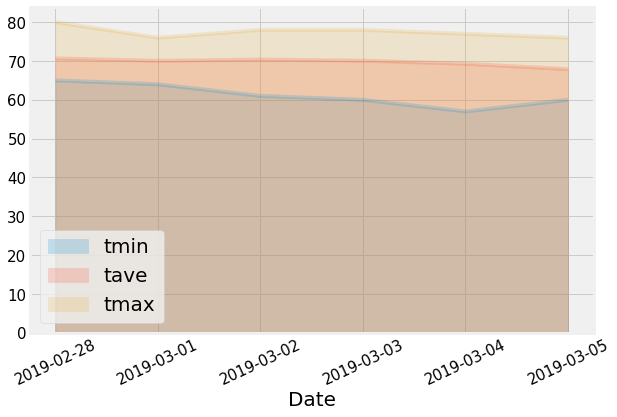

In [93]:
# Use Pandas to plot an area plot (stacked=False) for the daily normals.
t_norms.plot.area(stacked=False, alpha = .2, figsize=(9, 6), fontsize=15)
plt.legend(fontsize=20)
plt.xlabel('Date', fontsize = 20)
plt.xticks(rotation=25)
plt.show()